<a href="https://colab.research.google.com/github/shatha-me/Calories-Burnt-Prediction/blob/main/CaloriesBurntPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calories Burnt Prediction using Machine Learning

## Project Overview
The goal of this project is to predict the number of calories burned during physical exercise based on personal and activity-related features such as age, weight, duration, heart rate, and body temperature.

## Dataset
This dataset contains exercise data and the corresponding calories burned for each individual.
It will be used to build and evaluate regression models.


In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [74]:
exercise_df = pd.read_csv('/content/exercise.csv')
calories_df = pd.read_csv('/content/calories.csv')

In [75]:
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [76]:
exercise_df.shape

(15000, 8)

In [77]:
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 937.6+ KB


In [78]:
calories_df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [79]:
calories_df.shape

(15000, 2)

In [80]:
calories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User_ID   15000 non-null  int64  
 1   Calories  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 234.5 KB


### 🟢 Merge the Two Datasets

In [81]:
df = pd.merge(exercise_df, calories_df, on='User_ID')

In [82]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [83]:
df.shape

(15000, 9)

In [84]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


### Initial Observations
- The dataset contains 1500 rows and 9 columns.
- No missing values were observed in the dataset.
- The target variable is `Calories`, which is continuous → regression problem.


### 🟢 Numerical Features Distribution

In [85]:
numerical_features = ['Age', 'Height', 'Weight', 'Duration',
                      'Heart_Rate', 'Body_Temp', 'Calories']

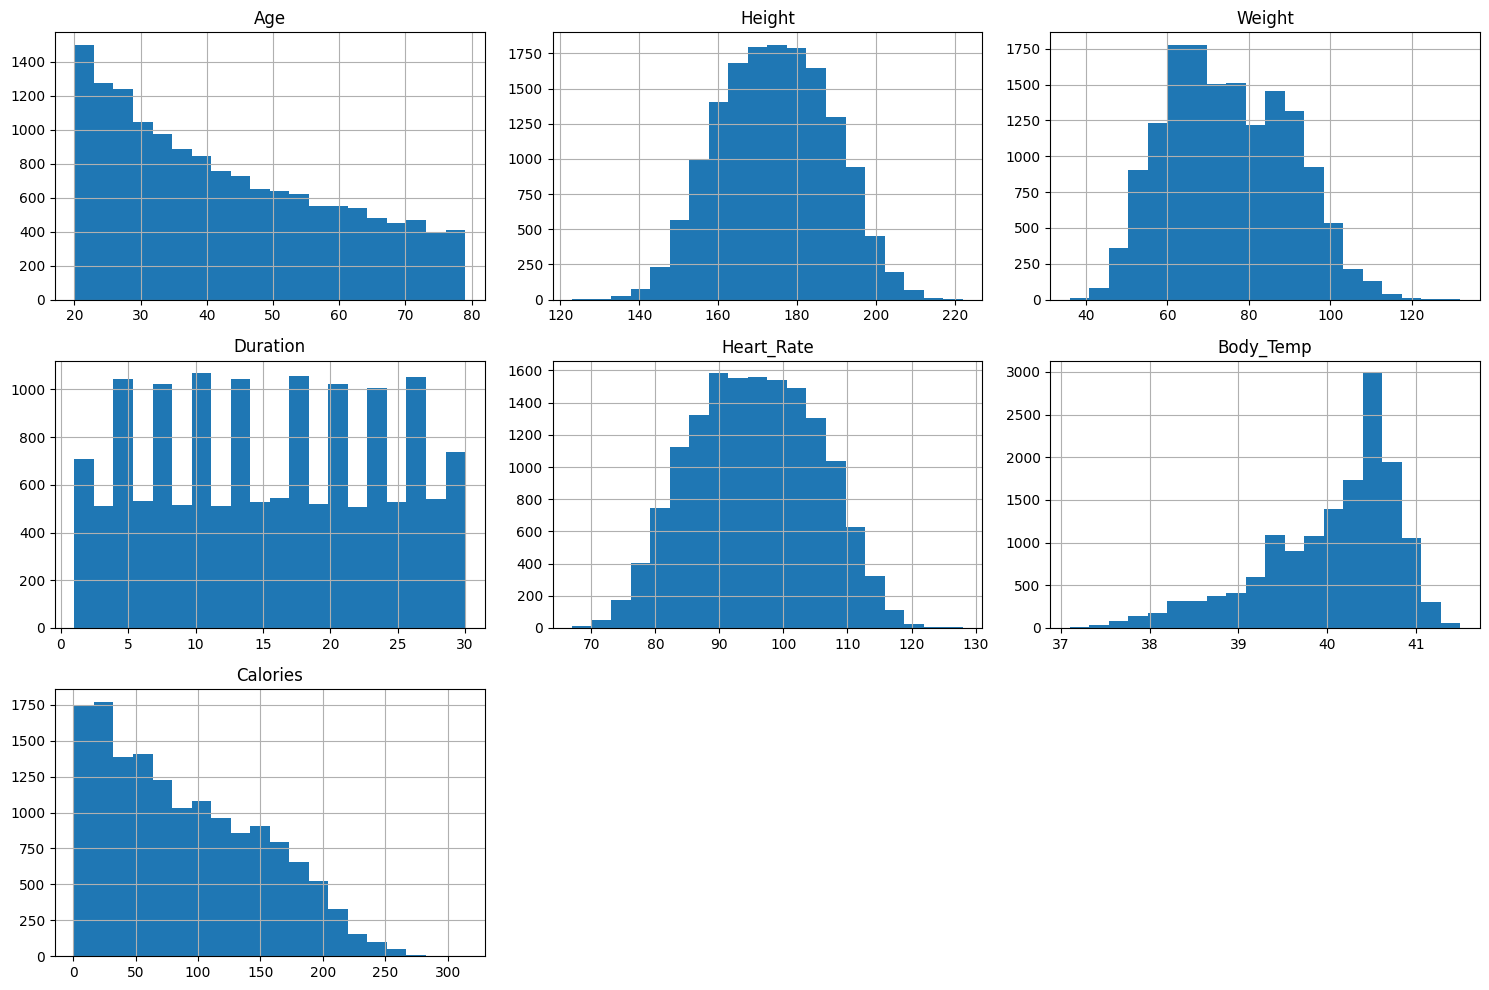

In [86]:
df[numerical_features].hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()

### 🟢 Gender Distribution

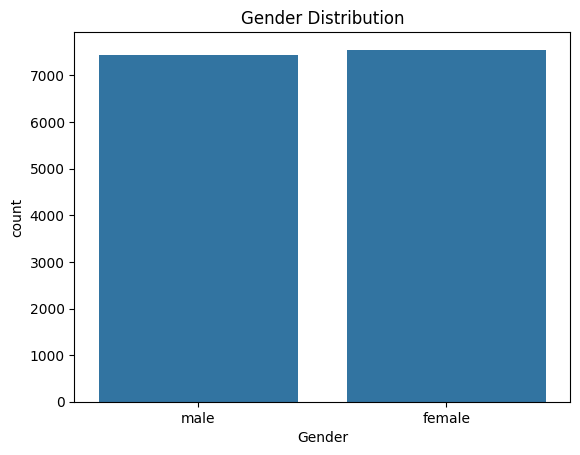

In [87]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

### 🟢 Target Variable Distribution (Calories)

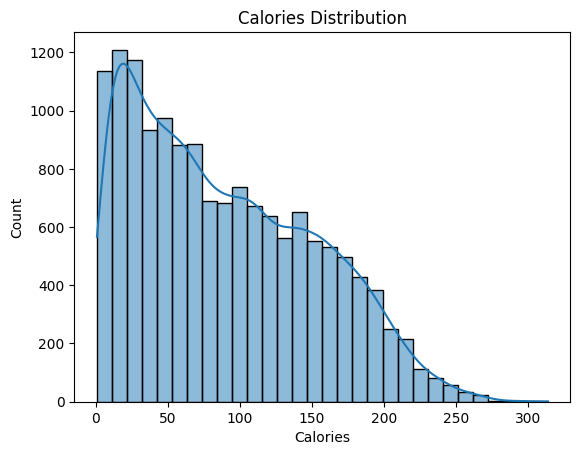

In [88]:
sns.histplot(df['Calories'], bins=30, kde=True)
plt.title('Calories Distribution')
plt.show()

### Univariate Analysis Insights
- Most numerical features show approximately normal distributions.
- Calories distribution is slightly left-skewed.
- Gender distribution appears balanced.

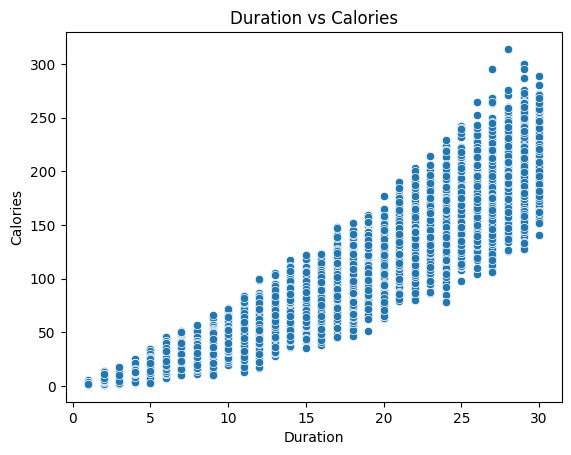

In [89]:
# 🟢 Duration vs Calories
sns.scatterplot(x='Duration', y='Calories', data=df)
plt.title('Duration vs Calories')
plt.show()

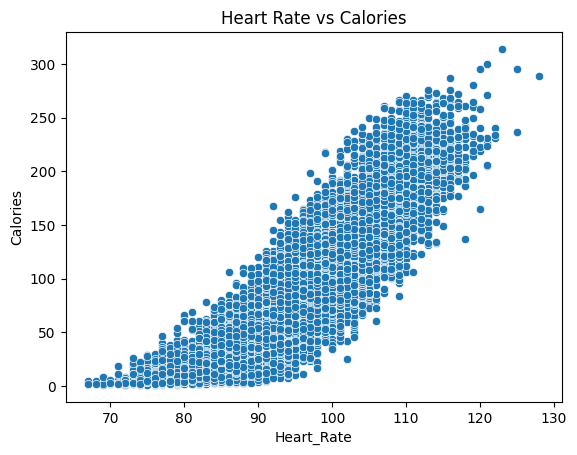

In [90]:
# 🟢⃣ Heart Rate vs Calories
sns.scatterplot(x='Heart_Rate', y='Calories', data=df)
plt.title('Heart Rate vs Calories')
plt.show()


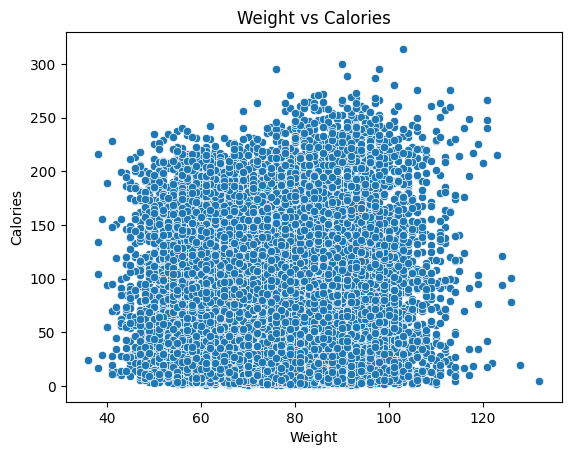

In [91]:
# 🟢 Weight vs Calories
sns.scatterplot(x='Weight', y='Calories', data=df)
plt.title('Weight vs Calories')
plt.show()

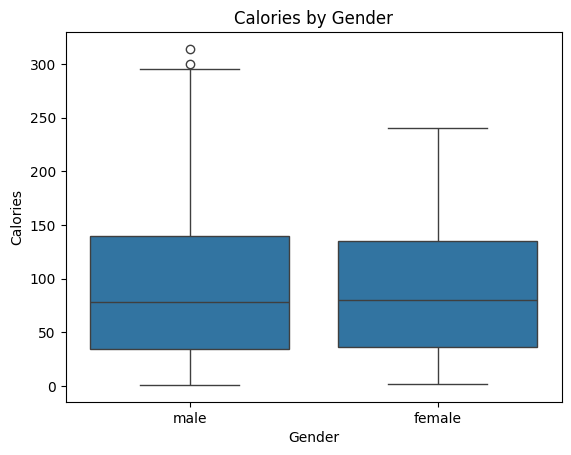

In [92]:
# 🟢 Gender vs Calories
sns.boxplot(x='Gender', y='Calories', data=df)
plt.title('Calories by Gender')
plt.show()

### Bivariate Analysis Insights
- Calories burned increases with exercise duration.
- Higher heart rate is associated with higher calorie burn.
- Weight shows a moderate positive relationship with calories.
- Gender differences are observable but not dominant.


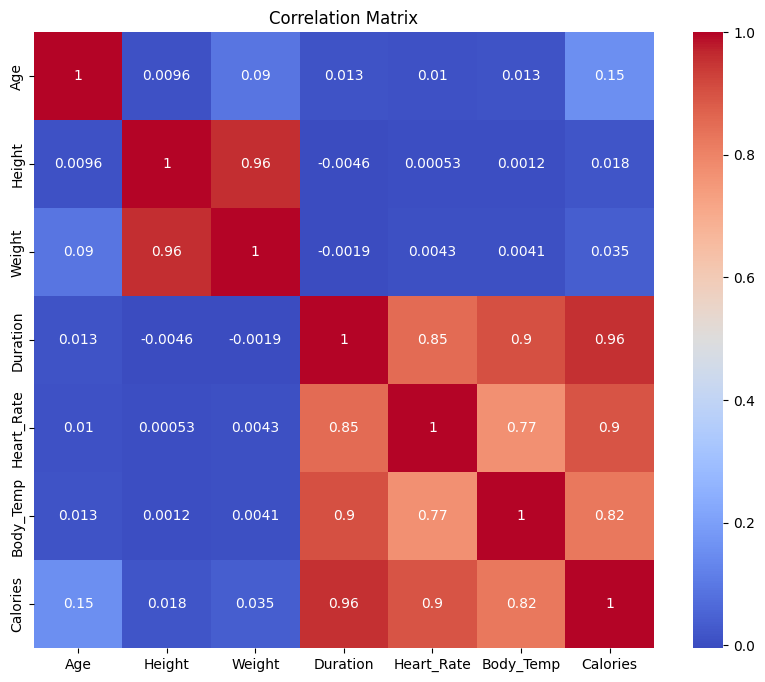

In [93]:
# 🟢 Correlation Matrix
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### EDA Summary
- Duration and Heart Rate are the most influential features affecting calories burned.
- The dataset shows strong linear relationships suitable for regression models.
- No major data quality issues were detected at this stage.

### 🟢 Encoding Categorical Variables

In [94]:
df['Gender'].unique()

array(['male', 'female'], dtype=object)

In [95]:
df['Gender'] = df['Gender'].map({'male': 1, 'female': 0})

In [96]:
df['Gender'].value_counts()

,count
Gender,
0,7553
1,7447


### 🟢 Feature Engineering

In [97]:
# 🔸 1️⃣ BMI (Body Mass Index)
df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)

In [98]:
# 🔸 2️⃣ Duration per Weight
df['Duration_Weight_Ratio'] = df['Duration'] / df['Weight']

In [99]:
# 🔸 3️⃣ Log Transformation
df['Calories_log'] = np.log(df['Calories'])

In [100]:
# Feature Selection
df.drop(columns=['User_ID'], inplace=True)

In [101]:
# 🟢 Define Features & Target

# 🎯 Target
y = df['Calories']

# 🧠 Features
X = df.drop(columns=['Calories', 'Calories_log'])

In [102]:
# 🟢 Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((12000, 9), (3000, 9))

In [103]:
# 🟢 Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [104]:
# 🟢 Final Check

X_train_scaled.shape

(12000, 9)

In [105]:
X_test_scaled.shape

(3000, 9)

### Preprocessing Summary
- Categorical variables were encoded.
- New meaningful features were engineered (BMI, ratios).
- Data was scaled to improve model performance.
- Dataset is now ready for regression modeling.


### Modeling & Baseline Regression

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [107]:
# 🟢 Baseline Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [108]:
# 🟢 Predictions
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

In [109]:
# 🟢 Evaluate Model
def regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2


In [110]:
# 🔹 Train Performance
train_mae, train_rmse, train_r2 = regression_metrics(y_train, y_train_pred)
print("Train MAE:", train_mae)
print("Train RMSE:", train_rmse)
print("Train R²:", train_r2)

Train MAE: 7.922906086035321
Train RMSE: 10.689148526662667
Train R²: 0.9704441754033296


In [111]:
# 🔹 Test Performance
test_mae, test_rmse, test_r2 = regression_metrics(y_test, y_test_pred)
print("Test MAE:", test_mae)
print("Test RMSE:", test_rmse)
print("Test R²:", test_r2)

Test MAE: 8.071112933135652
Test RMSE: 10.878810531606385
Test R²: 0.9706752642580064


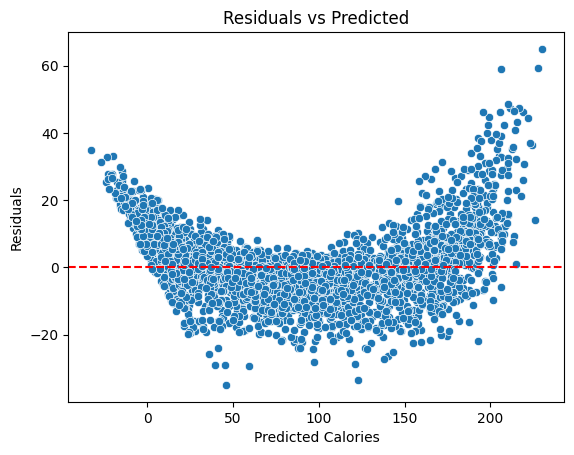

In [112]:
# 🟢 Residual Analysis
residuals = y_test - y_test_pred
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Calories')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

In [113]:
# 🟢 Feature Importance (coefficients)
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', ascending=False)

coefficients

,Feature,Coefficient
4,Duration,66.948510
3,Weight,46.902315
5,Heart_Rate,18.991565
1,Age,8.714600
0,Gender,0.017321
6,Body_Temp,-13.091692
8,Duration_Weight_Ratio,-13.092962
7,BMI,-15.923487
2,Height,-40.499324


### Linear Regression Baseline
- Train R²: 0.9706752642580064 , Test R²: 0.9704441754033296
- MAE / RMSE it is goood!
- Main Features: Duration, Heart Rate, BMI.
- Residuals plot shows minor heteroscedasticity; model may benefit from more complex models.


### Model Improvement & Advanced Regression

In [114]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

### 🟢 Random Forest Regressor

In [115]:
# 🔸 1️⃣ Initialize Model
rf_model = RandomForestRegressor(random_state=42)


# 🔸 2️⃣ Train Model
rf_model.fit(X_train_scaled, y_train)


# 🔸 3️⃣ Predictions
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)


# 🔸 4️⃣ Evaluate
train_mae_rf, train_rmse_rf, train_r2_rf = regression_metrics(y_train, y_train_pred_rf)
test_mae_rf, test_rmse_rf, test_r2_rf = regression_metrics(y_test, y_test_pred_rf)

print("Random Forest - Train R²:", train_r2_rf, "Test R²:", test_r2_rf)
print("MAE / RMSE - Train:", train_mae_rf, "/", train_rmse_rf)
print("MAE / RMSE - Test:", test_mae_rf, "/", test_rmse_rf)


Random Forest - Train R²: 0.9996610863568095 Test R²: 0.9980849606468998
MAE / RMSE - Train: 0.6970891666666666 / 1.144632564770605
MAE / RMSE - Test: 1.7663366666666667 / 2.7800538663846064


### 🟢 Gradient Boosting Regressor

In [118]:
# 🔸 1️⃣ Initialize Model
gb_model = GradientBoostingRegressor(random_state=42)


# 🔸 2️⃣ Train Model
gb_model.fit(X_train_scaled, y_train)


# 🔸 3️⃣ Predictions
y_train_pred_gb = gb_model.predict(X_train_scaled)
y_test_pred_gb = gb_model.predict(X_test_scaled)


# 🔸 4️⃣ Evaluate
train_mae_gb, train_rmse_gb, train_r2_gb = regression_metrics(y_train, y_train_pred_gb)
test_mae_gb, test_rmse_gb, test_r2_gb = regression_metrics(y_test, y_test_pred_gb)

print("Gradient Boosting - Train R²:", train_r2_gb, "Test R²:", test_r2_gb)


Gradient Boosting - Train R²: 0.9967796959791635 Test R²: 0.9966490060294698


In [125]:
# 🟢  Hyperparameter Tuning (Random Forest Example)

# 🔸 1️⃣ Define Parameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


# 🔸 2️⃣ GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           scoring='r2',
                           n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2')

In [126]:
# # 🔸 3️⃣ Best Parameters & Model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Random Forest Parameters:", best_params)

Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


### 🔹 Inference & Prediction

In [127]:
# 🟢 Prepare Sample Input
sample_user = {
    'Gender': 'male',
    'Age': 30,
    'Height': 175,
    'Weight': 70,
    'Duration': 45,
    'Heart_Rate': 120,
    'Body_Temp': 37.0
}

# 🟢 Convert to DataFrame
sample_df = pd.DataFrame([sample_user])


# 🟢 Preprocessing
sample_df['Gender'] = sample_df['Gender'].str.lower().str.strip().map({'male': 1, 'female': 0})

# 🟢 Feature Engineering
sample_df['BMI'] = sample_df['Weight'] / ((sample_df['Height']/100)**2)
sample_df['Duration_Weight_Ratio'] = sample_df['Duration'] / sample_df['Weight']


In [128]:
# 🟢 Align Columns
sample_df = sample_df[X_train.columns]

# 🟢 Scale Features
sample_df_scaled = scaler.transform(sample_df)


# 🟢 Predict Calories
predicted_calories = best_model.predict(sample_df_scaled)
print(f"Predicted Calories Burned: {predicted_calories[0]:.2f} kcal")

Predicted Calories Burned: 226.81 kcal
